# Responses to the Relax Inc. take-home challenge

Load libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime as dt
import pickle

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## 1. Datasets

Two tables:
1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years.
2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Let's read them in:

In [2]:
# The first file, with users:
du = pd.read_csv('takehome_users.csv',encoding='latin-1')
du.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
du['creation_time'] = pd.to_datetime(du['creation_time'])
du['last_session_creation_time'] = pd.to_datetime(du['last_session_creation_time'],unit='s') # from unix timestamp

In [5]:
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Missing values only in two columns: last_session_creation_time and invited_by_user_id.

In [6]:
#The second file, with their logins history:
dl = pd.read_csv('takehome_user_engagement.csv')
dl.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
dl['time_stamp'] = pd.to_datetime(dl['time_stamp'])
dl = dl.set_index('time_stamp')

In [9]:
dl.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [10]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


Are all the 12,000 users included in the login file?:

In [11]:
dl['user_id'].nunique()

8823

Nope. For some reason, only 8,823 users are included.

## 2. Adopted users

Define an __"adopted user"__ as a user who has logged into the product on three separate days in at least one seven-day period.

First, let's check how many total logins for each user:

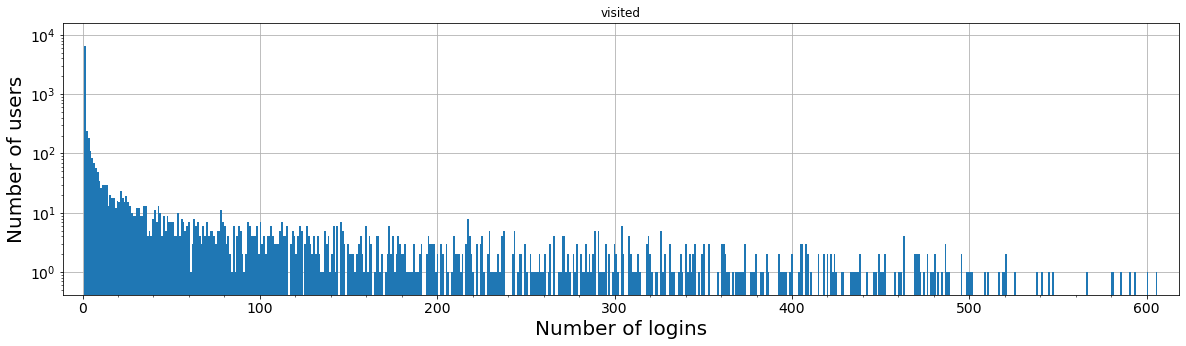

In [12]:
dl.groupby('user_id').count().hist(bins=600,log=True)

plt.xlabel('Number of logins'); plt.ylabel('Number of users');

Let's now find active users using the definition above.

In [13]:
dl.head(20)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2,1
2014-01-08 03:45:04,2,1
2014-02-03 03:45:04,2,1
2014-02-08 03:45:04,2,1


Let's aggregate the number of logins using the pandas rolling function with the window of 7 days and both window bounadaries included in the aggregation.

In [14]:
dl.groupby('user_id')['visited'].rolling('7d',close='both').count().head(20)

user_id  time_stamp         
1        2014-04-22 03:53:30    1.0
2        2013-11-15 03:45:04    1.0
         2013-11-29 03:45:04    1.0
         2013-12-09 03:45:04    1.0
         2013-12-25 03:45:04    1.0
         2013-12-31 03:45:04    2.0
         2014-01-08 03:45:04    1.0
         2014-02-03 03:45:04    1.0
         2014-02-08 03:45:04    2.0
         2014-02-09 03:45:04    3.0
         2014-02-13 03:45:04    3.0
         2014-02-16 03:45:04    2.0
         2014-03-09 03:45:04    1.0
         2014-03-13 03:45:04    2.0
         2014-03-31 03:45:04    1.0
3        2013-03-19 23:14:52    1.0
4        2013-05-22 08:09:28    1.0
5        2013-01-22 10:14:20    1.0
6        2013-12-19 03:37:06    1.0
7        2012-12-20 13:24:32    1.0
Name: visited, dtype: float64

In [15]:
dl.groupby('user_id')['visited'].rolling('7d',close='both').count().reset_index().groupby('user_id')['visited'].max().head(7)

user_id
1    1.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
Name: visited, dtype: float64

Cool. For each user, we found the max numbers of logins within any 7-day period. Let's now set the threshold of at least 3 logins to define adopted users:

In [16]:
adopted_users = dl.groupby('user_id')['visited'].rolling('7d',closed='both').count().reset_index().groupby('user_id')['visited'].max()>=3
adopted_users = adopted_users.replace([False,True],[0,1])

In [17]:
adopted_users.head(7)

user_id
1    0
2    1
3    0
4    0
5    0
6    0
7    0
Name: visited, dtype: int64

In [18]:
adopted_users.name = 'target'
adopted_users.value_counts()

0    7167
1    1656
Name: target, dtype: int64

There are 1,656 adopted users out of 8,823 present in the 2nd file. 

*NB: if we didn't specify the rolling window as closed on both sides, the number of adopted users would drop to 1602. This is because the default rolling window in pandas is closed only on the right side.*

## 3. Identify which factors predict future user adoption

Let's merge the adopted_users series with the users dataframe, and then approach the task as a classification problem.

In [19]:
du = du.merge(adopted_users,how='left',left_on='object_id',right_index=True)
du.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,target
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [20]:
du = du.set_index('object_id')

In [21]:
du['target'].value_counts(dropna=False)

0.0    7167
NaN    3177
1.0    1656
Name: target, dtype: int64

We had about 3k users missing in the 2nd file, which after left-side merging give NaN values in the target varable. Let's replace NaNs by 0, assuming those user who didn't make it to the 2nd file were simply inactive.

In [22]:
du['target'] = du['target'].fillna(0)
du['target'].value_counts(dropna=False)

0.0    10344
1.0     1656
Name: target, dtype: int64

OK. Let's focus on feature engineering now. How many unique values for each feature:

In [23]:
du.nunique()

creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
target                            2
dtype: int64

A. We certainly don't need user names:

In [24]:
du = du.drop('name',axis=1)

B. Neither user email addresses. But perhaps we can save the email domains. How many are there?:

In [25]:
du['email'].str.split('@').str[-1].unique()

array(['yahoo.com', 'gustr.com', 'jourrapide.com', ..., 'uyhoy.com',
       'eaouk.com', 'iuxiw.com'], dtype=object)

In [26]:
du['email'].str.split('@').str[-1].nunique()

1184

1k is managable, so let's convert personal emails to email domains.

In [27]:
du['email'] = du['email'].str.split('@').str[-1]

C. There are two datetime columns: creation_time and last_session_creation_time. Do we need them? We already studied the activity of the user when defining adopted users, so we probably don't need the second variable. The time of the account creation might be useful, for example, if users churned because the service worsened over time. So, let's remove the 2nd column and convert the first one to the integer number of days from the earliest date in the file:

In [28]:
du = du.drop('last_session_creation_time',axis=1)
du['creation_time'] = ((du['creation_time'] - du['creation_time'].min())/np.timedelta64(1,'D')).astype('int')

D. We checked earlier that the missing values were present in the last_session_creation_time and invited_by_user_id columns. The first one is gone, let's replace NaNs in the 2nd one to 0.

In [29]:
du['invited_by_user_id'] =  du['invited_by_user_id'].fillna(0)

In [30]:
du.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  int64  
 1   email                       12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   invited_by_user_id          12000 non-null  float64
 7   target                      12000 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 843.8+ KB


Good, no more missing values. What do we have in the dataset now?:

In [31]:
du.head()

,creation_time,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,target
object_id,,,,,,,,
1,691,yahoo.com,GUEST_INVITE,1,0,11,10803.0,0.0
2,533,gustr.com,ORG_INVITE,0,0,1,316.0,1.0
3,292,gustr.com,ORG_INVITE,0,0,94,1525.0,0.0
4,355,yahoo.com,GUEST_INVITE,0,0,1,5151.0,0.0
5,231,yahoo.com,GUEST_INVITE,0,0,193,5240.0,0.0


Two categorical variables: email and creation_source. Let's convert them to numerical features. Let's use LabelEcoder for 1184 email domains and one-hot encoding for 5 creation sources:

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
du['email'] = le.fit_transform(du['email'].values)

du = pd.concat((du,pd.get_dummies(du['creation_source'], prefix='creation_source')),axis=1).drop('creation_source',axis=1)

du.head()

OK. we're ready for the modelling. We were supposed to spent no more than 2 hours for this project, so let's study the feature importance with just one model, for example with the LighGBM gradient boosting model, which usually has better performance than Random Forest and is quicker than XGBoost.

In [33]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
X = du.drop('target',axis=1)
y = du['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 11), (9000,), (3000, 11), (3000,))

In [35]:
%%time
lgb = LGBMClassifier(random_state=123)

grid = {'boosting_type': ['gbdt','dart'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.5],
        'num_leaves': [16, 32, 64]}

lgb_grid_cv = GridSearchCV(lgb,param_grid=grid,scoring='roc_auc',return_train_score=True,cv=3,n_jobs=-1)
        
lgb_grid_cv.fit(X_train, y_train)
        
print("Best Parameters: " + str(lgb_grid_cv.best_params_))

Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 16}
CPU times: user 1.06 s, sys: 113 ms, total: 1.17 s
Wall time: 40.7 s


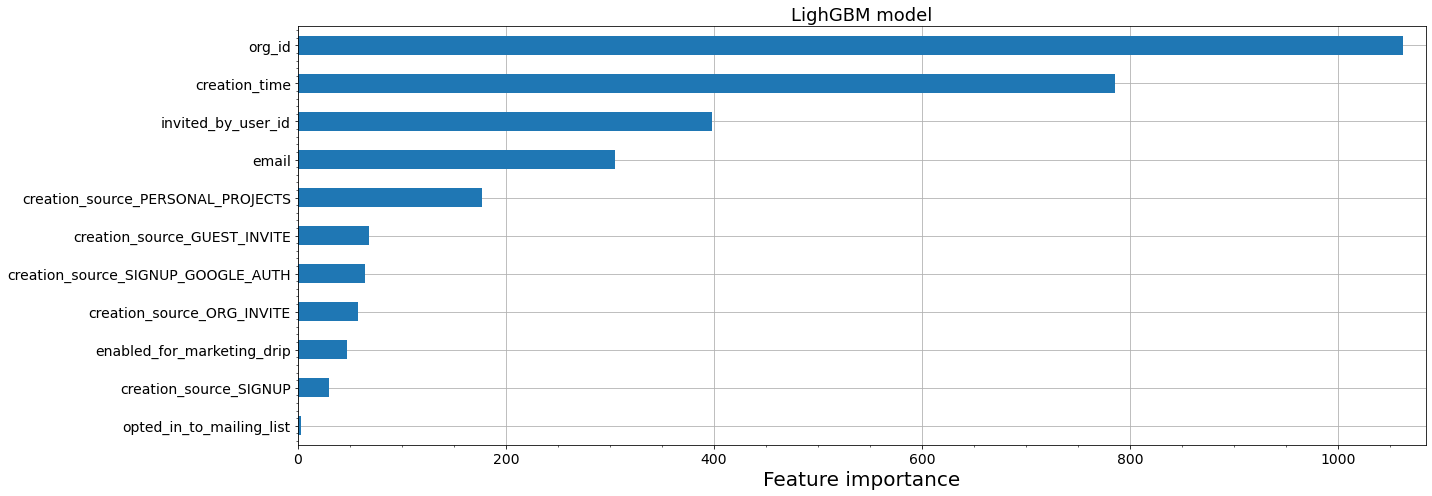

In [36]:
lgb_fi = pd.Series(lgb_grid_cv.best_estimator_.feature_importances_, index=X.columns)

ax = lgb_fi.sort_values().plot.barh(figsize=(20,7))
ax.set_title('LighGBM model',fontsize=18); ax.set_xlabel('Feature importance')

plt.tight_layout()

To draw final coclusions, let's plot the distributions of the 4 most significant features, separately for users who were adopted and usered who churned:

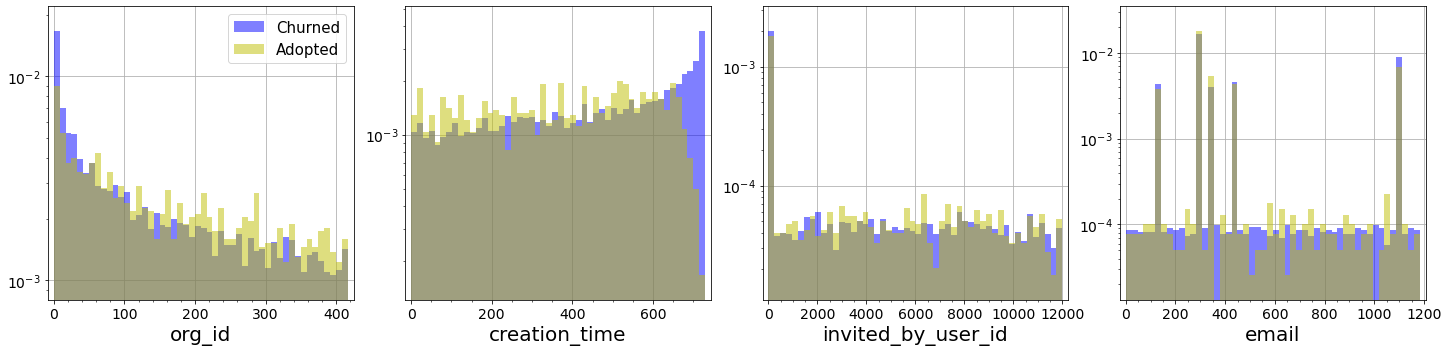

In [37]:
fig, ax = plt.subplots(1,4,figsize=(20,5))

#ax = ax.ravel()
#ax[7].set_axis_off()

for i,col in enumerate(lgb_fi.sort_values(ascending=False).index[:4]):
    
    r = (du[col].min(),du[col].max()); b = 50
    
    du[du['target']==0][col].plot(kind='hist',density=True,ax=ax[i],range=r,bins=b,color='b',alpha=0.5,label='Churned')
    du[du['target']==1][col].plot(kind='hist',density=True,ax=ax[i],range=r,bins=b,color='y',alpha=0.5,label='Adopted')
    ax[i].set_yscale('log')
    
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("")
    if i==4: ax[i].set_ylabel("N. of customers (normalized)",position=(0,1.1))
        
ax[0].legend(fontsize=15)
fig.tight_layout()

Interestingly, the 'creation time' feature shown in the second plot exhibits a high churn rate at the end of the period under study, but we think this might be an artifact related to the definition of the adopted user. Apparently a period of about a year is needed for a user to be able to login more than 3 times in 7 consequtive days.


To conclude, it seems that the most significant factors for the customer adoption are:
1. __the organization to which the users belong to (org_id)__; there is a clear excess of churned (adopted) users for organizations with low (high) id,
2. __whether the user was invited by other user (invited_by_other_user_id)__; there are less adopted users who where not invited by other users (bin 0), and about half of the users who invite others have a strong adopting power (those with ids for which yellow histogram is in excess to the blue histogram). In addition, a pretty large contribution from the __creation_source_PERSONAL_PROJECTS__ variable in the feature important plot suggests that the adopted users are being invited to join another user's personal workspace,
4. __the email domain they use (email)__; there are a few domains whose users didn't adopt at all.